"""<br>
@Author: Prayag Bhoir<br>
@Date: 27-09-2024<br>
@Last Modified by: Prayag Bhoir<br>
@Last Modified time: 28-09-2024<br>
@Title : Exploratory Data Analysis on Iris Dataset<br>
"""

In [19]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# Reading the CSV file
df = sns.load_dataset('iris') # in pandas df

# Printing top 5 rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df.shape

(150, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [17]:
data = df.drop_duplicates(subset ="species")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


In [18]:
df.value_counts("species")

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

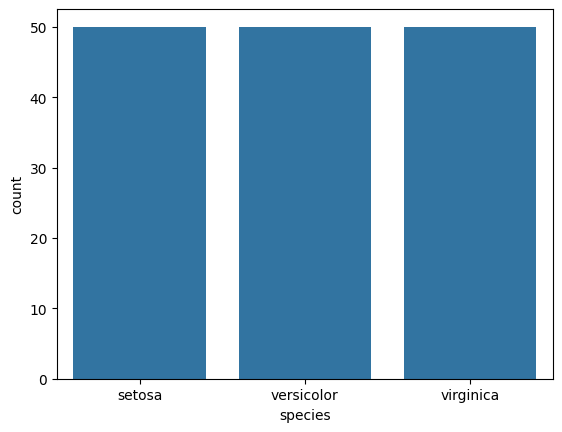

In [21]:
sns.countplot(x='species', data=df, )
plt.show()

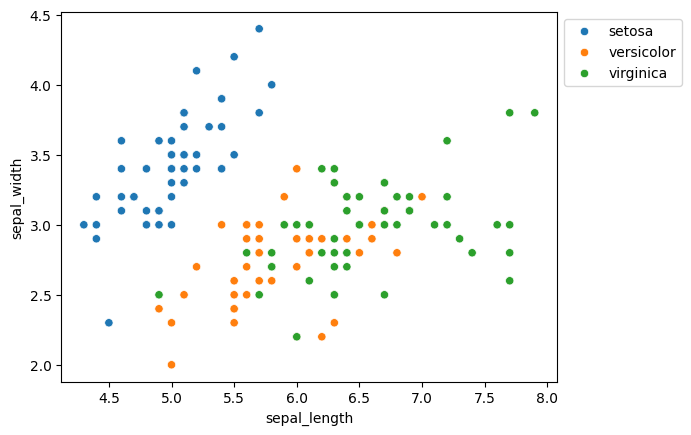

In [28]:
sns.scatterplot(x='sepal_length', y='sepal_width',
				hue='species', data=df, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

#### We can observe from the plot above that - 

Species Setosa has smaller sepal lengths but larger sepal widths.<br>
Versicolor Species lies in the middle of the other two species in terms of sepal length and width<br>
Species Virginica has larger sepal lengths but smaller sepal widths.

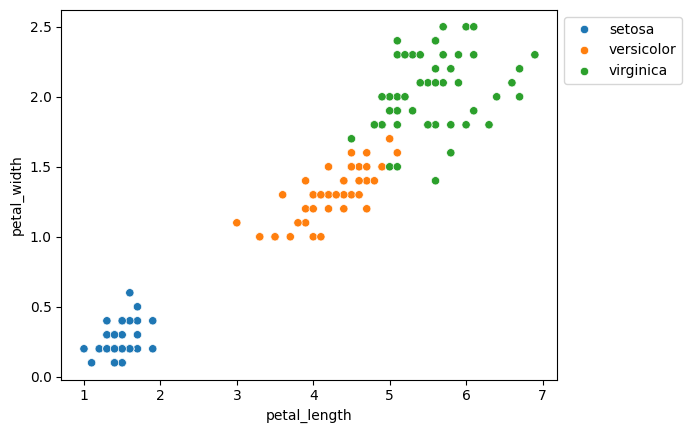

In [30]:
sns.scatterplot(x='petal_length', y='petal_width',
				hue='species', data=df, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

#### We can observe from the plot above that - 

Species Setosa has smaller petal lengths and widths.<br>
Versicolor Species lies in the middle of the other two species in terms of petal length and width<br>
Species Virginica has the largest of petal lengths and widths.

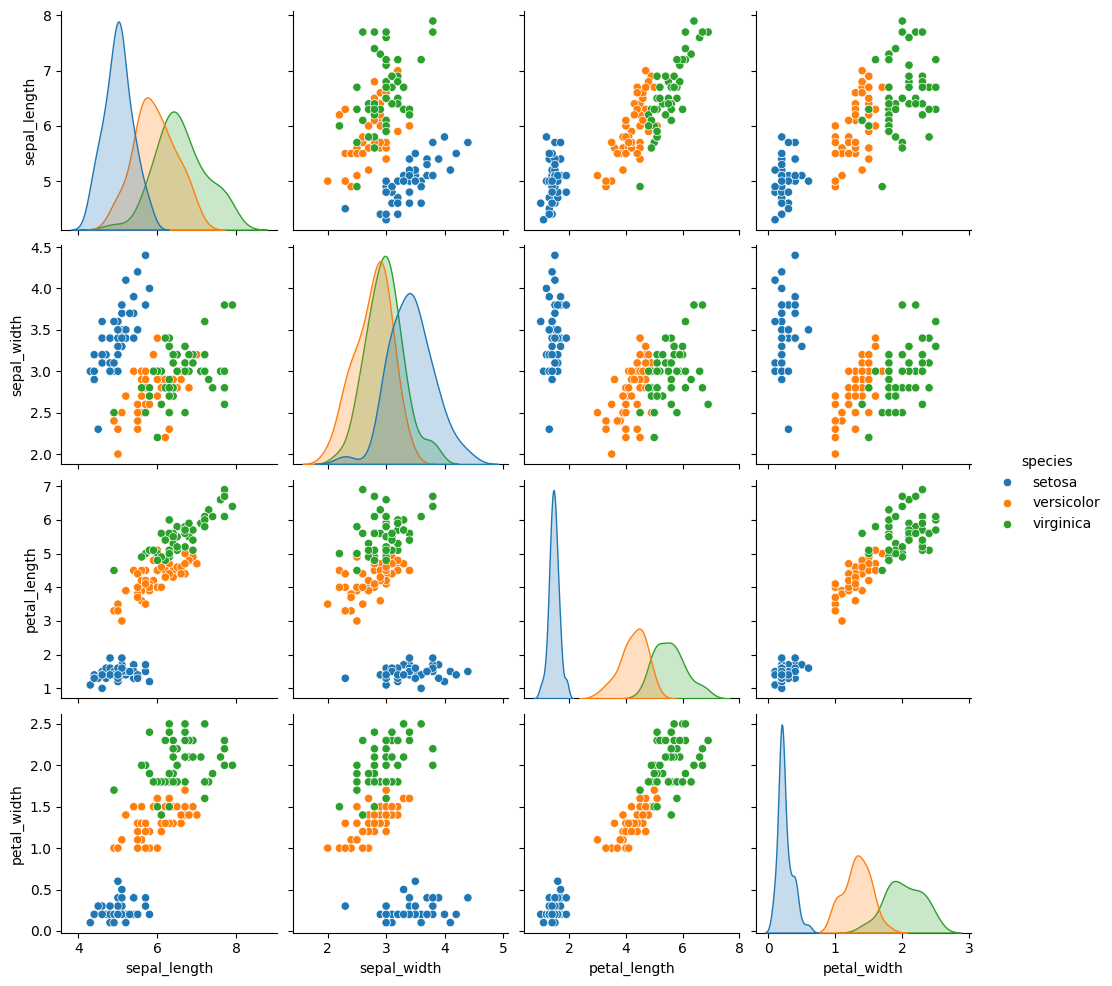

In [36]:
sns.pairplot(df,
			hue='species')

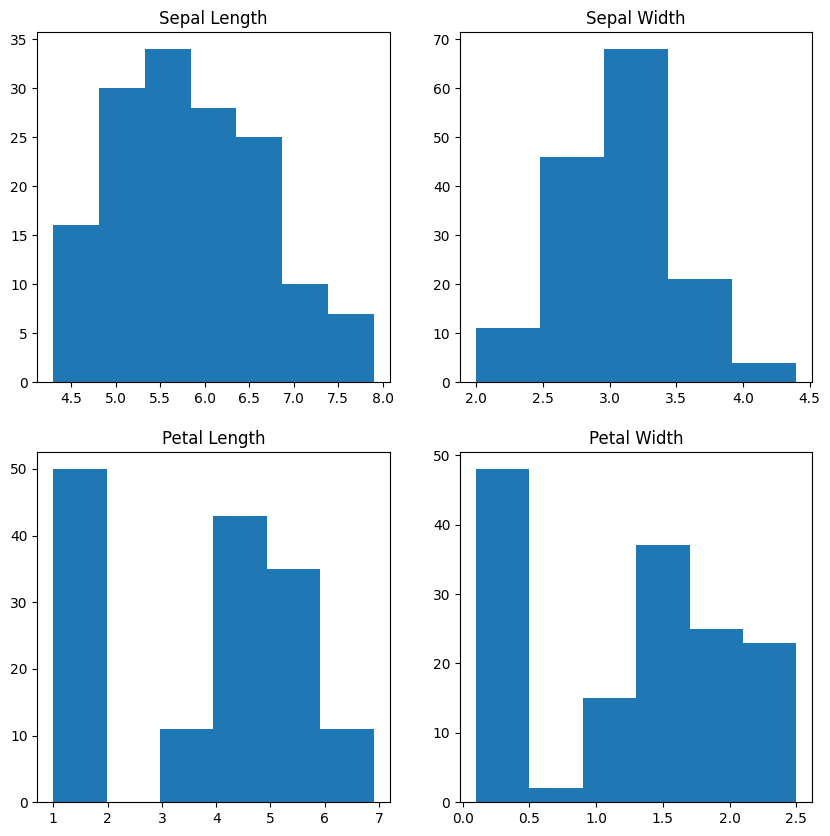

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['sepal_length'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['sepal_width'], bins=5);

axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['petal_length'], bins=6);

axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['petal_width'], bins=6);

#### We can observe from the plot above that - 
The sepal length has a maximum frequency of between 30 and 35, or between 5.5 and 6.<br>
The sepal width's maximum frequency, or around 70, falls between 3.0 and 3.5.<br>
The petal length has a maximum frequency of about 50, or between 1 and 2.<br>
The petal width's maximum frequency falls between 40 and 50, or between 0.0 and 0.5.<br>

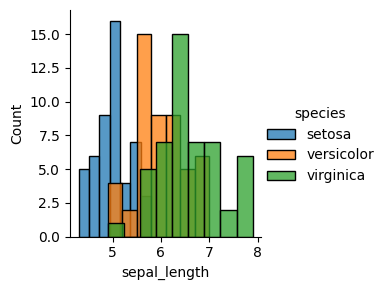

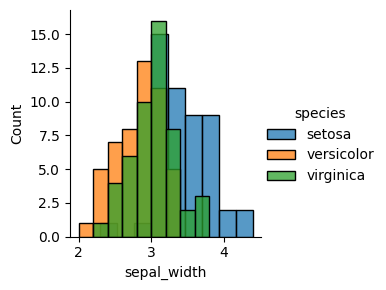

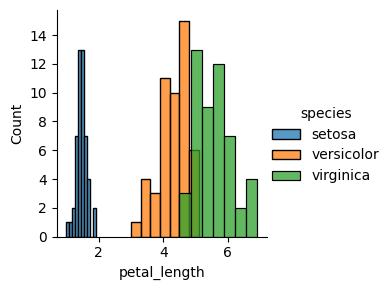

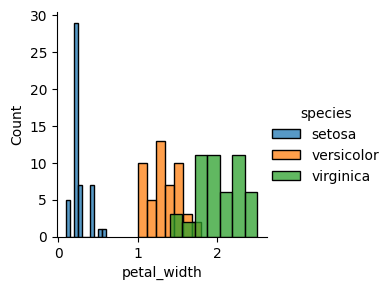

In [41]:
plot = sns.FacetGrid(df, hue="species")
plot.map(sns.histplot, "sepal_length").add_legend()

plot = sns.FacetGrid(df, hue="species")
plot.map(sns.histplot, "sepal_width").add_legend()

plot = sns.FacetGrid(df, hue="species")
plot.map(sns.histplot, "petal_length").add_legend()

plot = sns.FacetGrid(df, hue="species")
plot.map(sns.histplot, "petal_width").add_legend()

plt.show()

In [42]:
data.select_dtypes(include=['number']).corr(method='pearson')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.999226,0.795795,0.643817
sepal_width,-0.999226,1.000000,-0.818999,-0.673417
petal_length,0.795795,-0.818999,1.000000,0.975713
petal_width,0.643817,-0.673417,0.975713,1.000000


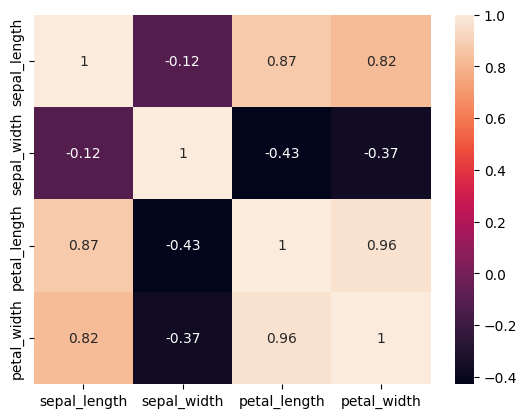

In [45]:
sns.heatmap(df.select_dtypes(include=['number']).corr(method='pearson'),
			annot = True)

plt.show()

#### We can observe from the plot above that - 

Petal width and petal length have high correlations. <br>
Petal length and sepal width have good correlations.<br>
Petal Width and Sepal length have good correlations.<br>

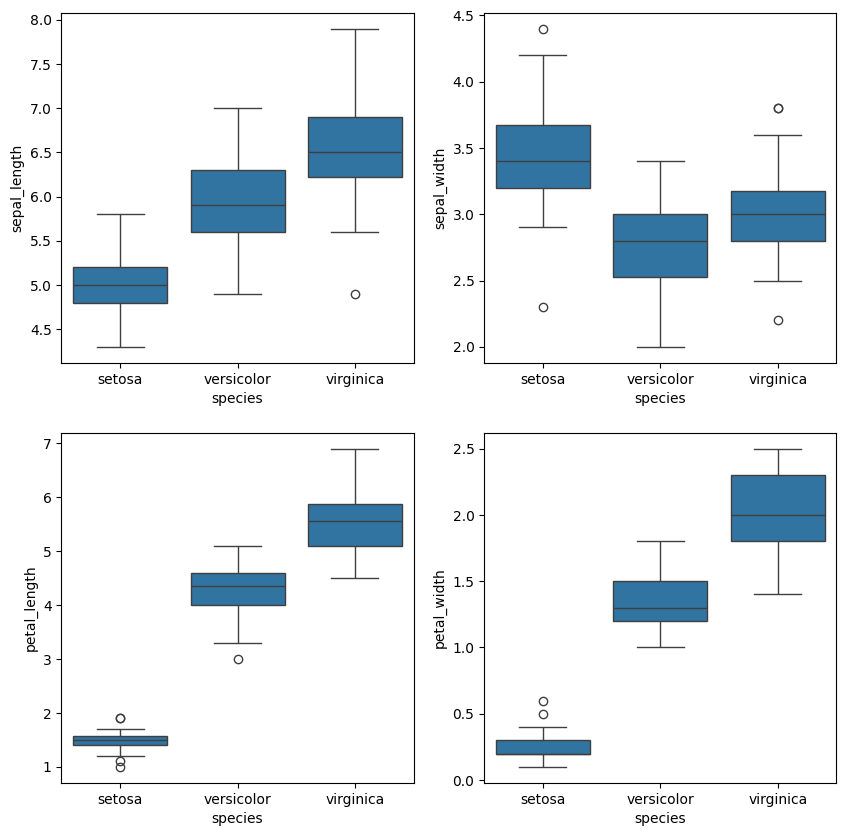

In [47]:
def graph(y):
	sns.boxplot(x="species", y=y, data=df)

plt.figure(figsize=(10,10))

# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('sepal_length')

plt.subplot(222)
graph('sepal_width')

plt.subplot(223)
graph('petal_length')

plt.subplot(224)
graph('petal_width')

plt.show()

#### We can observe from the plot above that - 
Species Setosa has the smallest features and less distributed with some outliers.<br>
Species Versicolor has the average features.<br>
Species Virginica has the highest features<br>

<Axes: xlabel='sepal_width'>

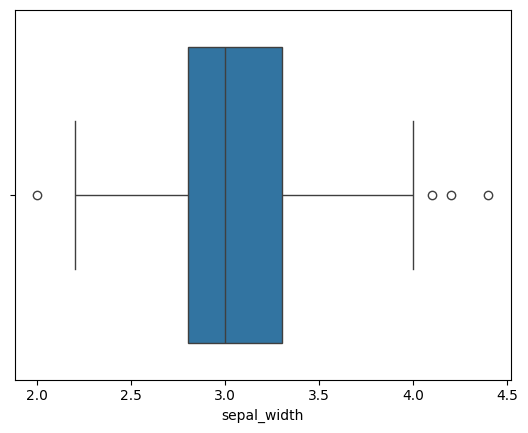

In [48]:
sns.boxplot(x='sepal_width', data=df)

In [49]:
import numpy as np

Old Shape:  (150, 5)
New Shape:  (146, 5)


<Axes: xlabel='sepal_width'>

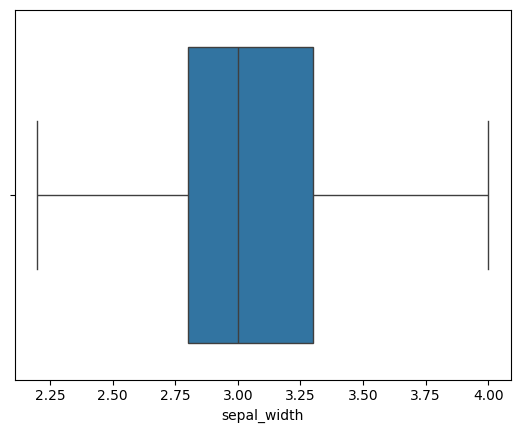

In [50]:
# IQR
Q1 = np.percentile(df['sepal_width'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(df['sepal_width'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['sepal_width'] >= (Q3+1.5*IQR))

# Lower bound
lower = np.where(df['sepal_width'] <= (Q1-1.5*IQR))

# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

sns.boxplot(x='sepal_width', data=df)